In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
%reload_ext autoreload
%autoreload 2

from fastai.vision import *

<font size="8">Dogs and cats classifier</font>



In [4]:
path = untar_data(URLs.DOGS)
path

PosixPath('/tmp/.fastai/data/dogscats')

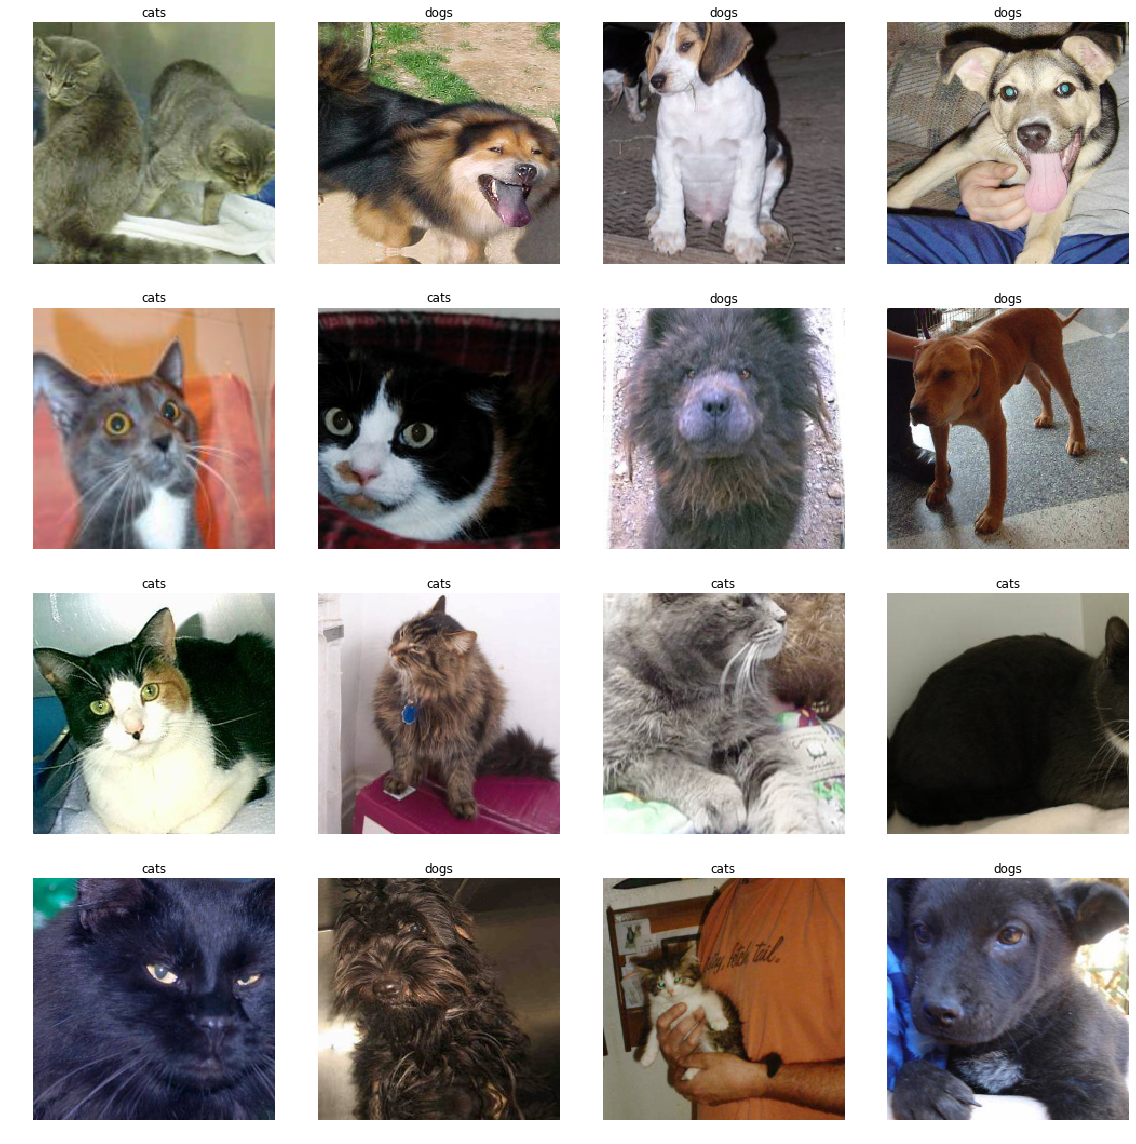

In [5]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
data.show_batch(rows=4)

> Using Restnet34 to train and test the classifier

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:06<00:00, 13472709.27it/s]


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 07:19
epoch	train_loss	valid_loss	accuracy
1	0.048187	0.027477	0.988500
2	0.022563	0.024907	0.990500
3	0.017952	0.017247	0.995000
4	0.016476	0.018968	0.993500
5	0.008154	0.019849	0.992000
6	0.009654	0.018833	0.993500


In [ ]:
accuracy(*learn.TTA())
